<a href="https://colab.research.google.com/github/Messbah/Tensorflow_Practice/blob/main/Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#creating a sample data for binary classification
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)


In [ ]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd
circles =  pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


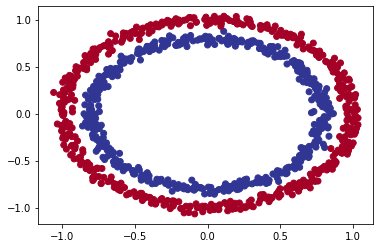

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
y= tf.constant(y)
y

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
#model creation
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
#model compilation
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
#model fitting
history = model.fit(X, y, epochs=100, verbose=0)
model.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

First model has 50% accuracy which is meaningless. Let's try to improve it.

In [ ]:
tf.random.set_seed(42)

new_model= tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])
new_model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["accuracy"])
new_history = new_model.fit(X, y, epochs=100, verbose=0)
new_model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0015085524646565318, 1.0]

Now we have got 100% accuracy.

Text(0.5, 0, 'epochs')

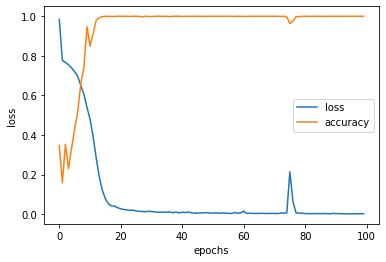

In [ ]:
pd.DataFrame(new_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

In [ ]:
#Function to plot the result: 
def plot_decision(model,X,y):
  X_min,X_max = X[:,0].min() -0.1, X[:,0].max()+0.1
  y_min,y_max = X[:,0].min() -0.1, X[:,0].max()+0.1
  xx,yy = np.meshgrid(np.linspace(X_min,X_max,100),
                      np.linspace(y_min,y_max,100))
  X_in = np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  # Make Predictions
  y_pred = model.predict(X_in)
  if len(y_pred[0]) > 1:
    print("Doing Multiclass Classification")
    y_pred = tf.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plotting Decision Boundary
  plt.contourf(xx, yy, y_pred,2, cmap = "RdGy")
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap="RdGy")
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

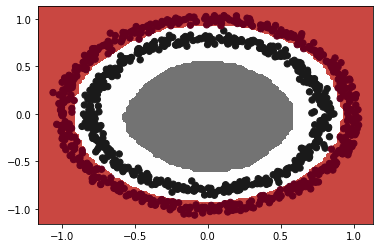

In [ ]:
plot_decision(model=new_model, X=X, y=y)

In [ ]:
len(X)

1000

In [ ]:
X_train,y_train = X[:800], y[:800]
X_test,y_test = X[800:],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
tf.random.set_seed(42)

test_model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                              
])

test_model.compile(loss="binary_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics=["accuracy"])
test_history = test_model.fit(X_train, y_train, epochs=25, verbose=0)
test_model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

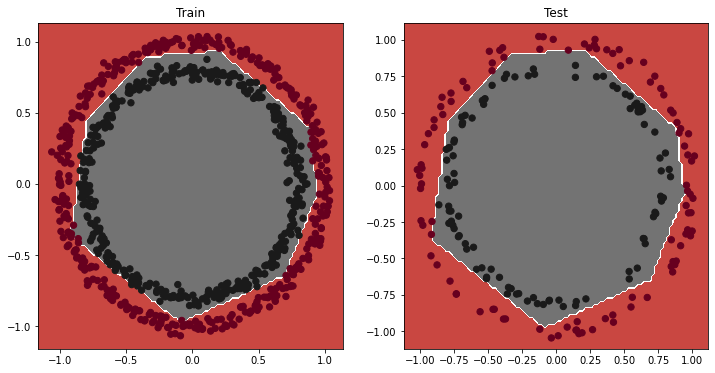

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision(test_model,X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision(test_model,X=X_test, y=y_test)
plt.show()

This new model provides 100% accuracy after 25 epochs only due to increased learning rate. 

Text(0.5, 0, 'epochs')

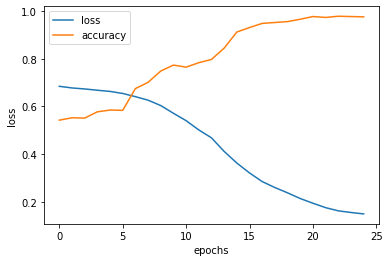

In [ ]:
pd.DataFrame(test_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
tf.random.set_seed(42)

# Create a model (same as model_8)
model_lr = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_lr.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_lr = model_lr.fit(X_train,
                        y_train, 
                        epochs=100,
                        callbacks=[lr_scheduler])

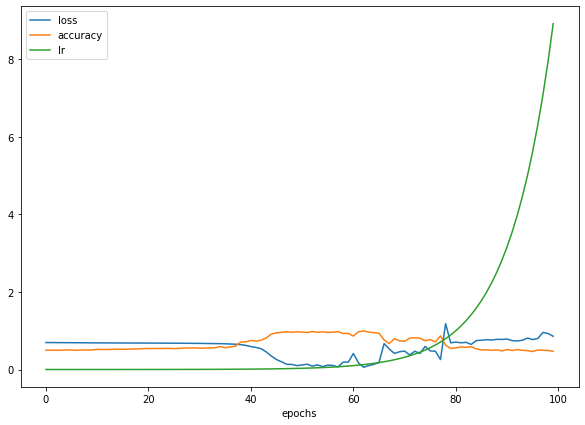

In [ ]:
pd.DataFrame(history_lr.history).plot(figsize=(10, 7), xlabel="epochs");

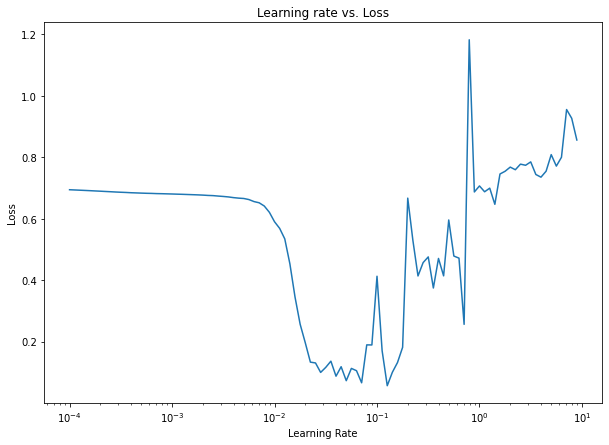

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_lr.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

**Optimal learning rate in between 10^-2 and 10^-1**

**Multiclass Classification**:
I will try to Classify Images of cloths in this section. The dataset I am going to use is called **fashion_mnist**. It is available in Tensorflow datasets. The dataset consists of a trainning set of 60,000 examples and a test set of 10,000 examples. 

In [80]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [83]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [84]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

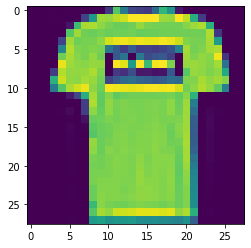

In [85]:
# Plot a sample
import matplotlib.pyplot as plt
plt.imshow(train_data[1])


In [86]:
train_labels[1]

0

Labels are as follows: \
0- T-shirt/Top \
1- Trouser \
2- Pullover \
3- Dress \
4- Coat \
5- Sandal \
6- Shirt \
7- Sneaker \
8- Bag \
9- Ankle boot \
So the upper example's label (0) indicates that It is a T-shirt.

In [87]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal" , "Shirt", "Sneaker", "Bag","Ankle boot"]


Text(0.5, 1.0, 'Dress')

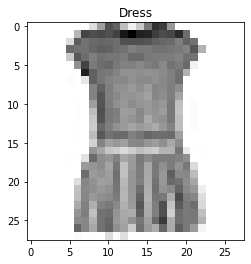

In [88]:
index = 3
plt.imshow(train_data[index],cmap =plt.cm.binary)
plt.title(class_names[train_labels[index]])

**Model Creation** \
* Input Shape = 28*28 (Image shape) 
* Output Shape = 10 (One per class of clothing)
* Loss Function = CategoricalCrossentropy() (if labels are one hot encoded)
  **OR** SparseCategoricalCrossentropy() (If labels are integers)
* Output Layer Activation = Softmax

In [ ]:
# One hot encoding for the labels
#tf.one_hot(train_labels,depth=10)

In [ ]:
tf.random.set_seed(42)
cloth_classification_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
cloth_classification_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                   metrics=["accuracy"])
model_history = cloth_classification_model.fit(train_data,train_labels,epochs=50,verbose = 1, validation_data=(test_data,test_labels))

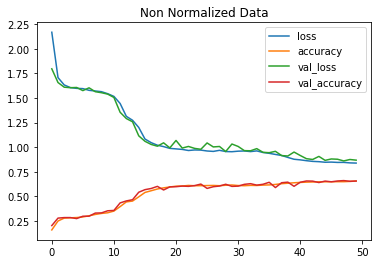

In [90]:
import pandas as pd

pd.DataFrame(model_history.history).plot(title="Non Normalized Data")

In [91]:
#Performing Normalization to see if it yeilds better result
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0


In [ ]:
tf.random.set_seed(42)
cloth_classification_model_norm = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
cloth_classification_model_norm.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                   metrics=["accuracy"])
model_history_norm = cloth_classification_model_norm.fit(train_data_norm,train_labels,epochs=50,verbose = 1, validation_data=(test_data_norm,test_labels))

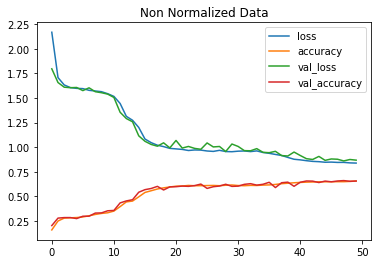

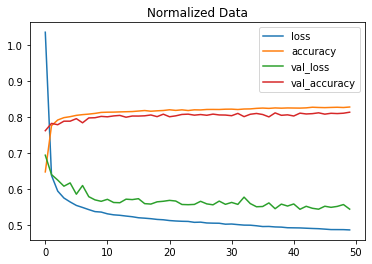

In [120]:
import pandas as pd

pd.DataFrame(model_history.history).plot(title="Non Normalized Data")

pd.DataFrame(model_history_norm.history).plot(title = "Normalized Data")


So, **Normalized Data** gives better accuracy. Now let's find optimal learning rate:

In [115]:
tf.random.set_seed(42)
lr_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
lr_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=["accuracy"])

lr_scheduler_new = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20))


lr_model_history = lr_model.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler_new])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

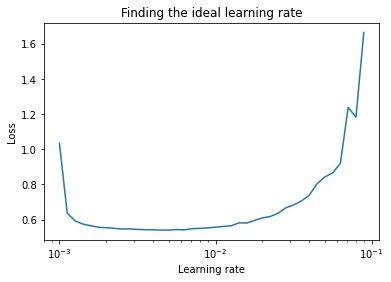

In [116]:
lrsn = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrsn,lr_model_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [96]:
import itertools 
import numpy as np
from sklearn.metrics import confusion_matrix
def check_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10),text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels: np.arrange(cm.shape[0])

  ax.set(title="Confusion_Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels, 
         yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [121]:
# Test some Prediction
y_probs = cloth_classification_model.predict(test_data)

y_probs[:5]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.54805213e-01, 1.55747503e-01, 1.42335191e-01, 1.14454776e-01,
        1.47601962e-01, 8.94604437e-03, 1.46433905e-01, 1.97842921e-04,
        1.29477337e-01, 1.13227046e-07],
       [1.54805213e-01, 1.55747503e-01, 1.42335191e-01, 1.14454776e-01,
        1.47601962e-01, 8.94604437e-03, 1.46433905e-01, 1.97842921e-04,
        1.29477337e-01, 1.13227046e-07],
       [1.54805213e-01, 1.55747503e-01, 1.42335191e-01, 1.14454776e-01,
        1.47601962e-01, 8.94604437e-03, 1.46433905e-01, 1.97842921e-04,
        1.29477337e-01, 1.13227046e-07],
       [1.54805213e-01, 1.55747503e-01, 1.42335191e-01, 1.14454776e-01,
        1.47601962e-01, 8.94604437e-03, 1.46433905e-01, 1.97842921e-04,
        1.29477337e-01, 1.13227046e-07]], dtype=float32)

In [122]:
y_probs_norm = cloth_classification_model_norm.predict(test_data_norm)

y_probs_norm[:5]

array([[1.42883075e-11, 8.79150017e-11, 2.20653556e-06, 1.78673560e-07,
        4.20690958e-06, 1.06951565e-01, 6.08856254e-09, 5.68293482e-02,
        4.92394727e-04, 8.35720181e-01],
       [1.88243177e-06, 1.84475610e-16, 9.42313969e-01, 1.50969117e-06,
        2.92455070e-02, 8.78365804e-18, 2.72025261e-02, 0.00000000e+00,
        1.23464258e-03, 1.59838478e-18],
       [6.11740979e-05, 9.98460293e-01, 1.04653729e-07, 1.46099424e-03,
        1.05246563e-05, 1.26274063e-22, 6.89969147e-06, 4.54603211e-17,
        3.56314374e-08, 1.03026303e-11],
       [2.62492613e-05, 9.97592747e-01, 4.48464334e-07, 2.28112121e-03,
        8.62073284e-05, 1.96330882e-20, 1.29504451e-05, 1.30238803e-14,
        2.17193531e-07, 3.58542951e-09],
       [9.36373100e-02, 4.31356148e-06, 1.79731265e-01, 2.55882386e-02,
        5.82032464e-02, 2.69350506e-19, 6.41781449e-01, 7.40099444e-30,
        1.05417788e-03, 5.17439616e-16]], dtype=float32)

In [123]:
y_probs_norm[0], tf.argmax(y_probs_norm[0]), class_names[tf.argmax(y_probs_norm[0])]

(array([1.42883075e-11, 8.79150017e-11, 2.20653556e-06, 1.78673560e-07,
        4.20690958e-06, 1.06951565e-01, 6.08856254e-09, 5.68293482e-02,
        4.92394727e-04, 8.35720181e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [124]:
y_preds = y_probs_norm.argmax(axis=1)

y_preds[:15]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4])

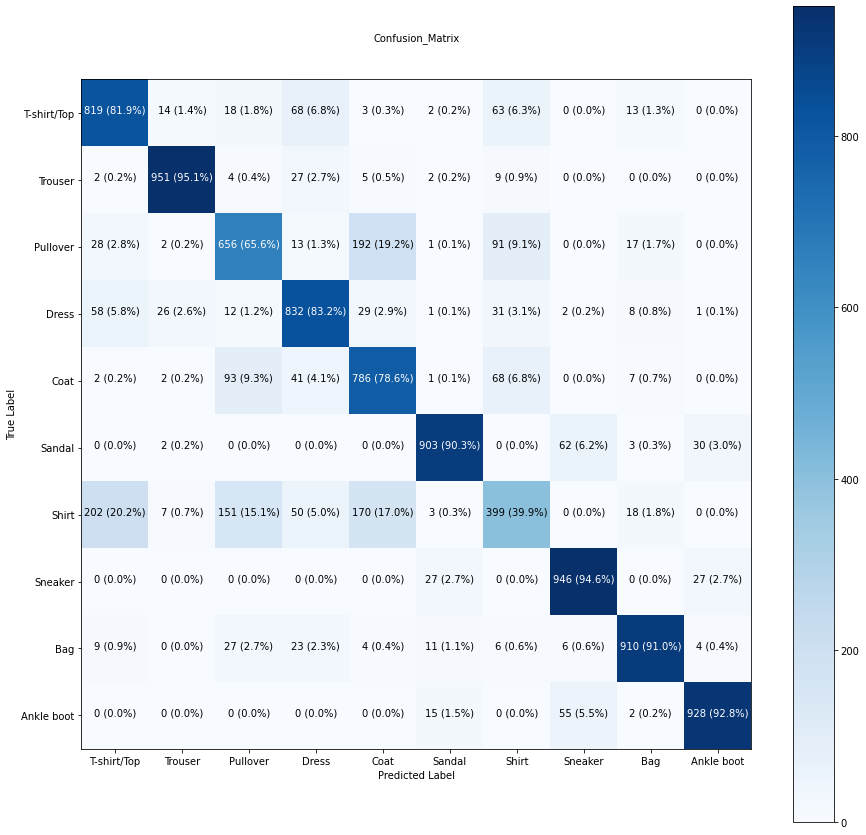

In [125]:
check_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15,15), text_size=10)

In [126]:
import random

def random_prediction(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

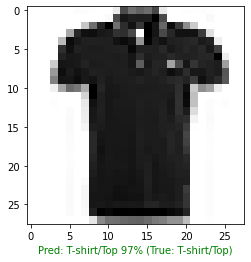

In [131]:
random_prediction(model=cloth_classification_model_norm, images=test_data_norm,true_labels=test_labels,classes=class_names)